This file contains the interpretability workings of LIME

In [1]:
import lime
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import numpy as np

In [2]:
df = pd.read_csv("../IMDB_with_predictions.csv")[0:1000:1]
model = keras.models.load_model("../CNN_Non_Dense")

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.review)
tokenized_texts = tokenizer.texts_to_sequences(df.review)
padded_texts = pad_sequences(tokenized_texts, padding="post", maxlen=1000)

Explanations

In [26]:
def prediction_fn(data):
    for d in data:
        print(d)
    pred = model.predict(data).round(2)
    if(pred[0] == 1):
        return np.array(((0,1.0), (0,0)))
    return np.array(((1.0, 0), (0,0)))

from lime import lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(class_names=[0,1], training_data=padded_texts)
explanations = explainer.explain_instance(padded_texts[0], prediction_fn, num_features=1000, num_samples=2)


[2.800e+01 4.000e+00 1.000e+00 8.000e+01 2.503e+03 4.500e+01 8.300e+02
 1.200e+01 1.020e+02 1.430e+02 3.800e+01 3.350e+02 2.504e+03 3.820e+02
 4.680e+02 2.700e+01 1.727e+03 3.700e+01 2.400e+01 2.370e+02 1.400e+01
 1.000e+01 7.000e+00 6.750e+02 4.600e+01 8.870e+02 1.500e+01 6.100e+01
 6.000e+00 6.000e+00 1.000e+00 8.300e+01 1.610e+02 1.200e+01 1.877e+03
 6.100e+01 3.900e+01 2.504e+03 1.300e+01 9.100e+01 6.677e+03 2.000e+00
 6.678e+03 1.270e+02 4.000e+00 4.500e+02 5.300e+01 2.870e+02 8.000e+00
 2.370e+02 3.300e+01 1.000e+00 4.000e+02 1.230e+02 2.022e+03 6.100e+01
 1.000e+01 7.000e+00 2.200e+01 3.000e+00 1.260e+02 1.700e+01 1.000e+00
 6.679e+03 1.728e+03 4.000e+01 9.755e+03 1.000e+01 1.260e+02 2.794e+03
 5.100e+01 5.200e+03 1.500e+01 4.247e+03 5.000e+00 7.010e+02 3.780e+02
 4.000e+01 4.500e+02 9.100e+01 7.000e+00 3.589e+03 8.000e+00 1.000e+00
 3.830e+02 3.200e+02 4.000e+00 1.000e+00 4.000e+02 6.000e+00 6.000e+00
 1.100e+01 7.000e+00 4.560e+02 2.504e+03 1.400e+01 1.200e+01 7.000e+00
 1.000

c:\Users\freis\anaconda3\envs\baseEnv\lib\site-packages\lime\lime_tabular.py:372: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  warnings.warn("""


In [21]:
print(explanations.as_list())

[('17.50 < 0 <= 254.25', 0.003530029643119604), ('2 <= 10.00', 0.003530029643119604), ('66.00 < 3 <= 569.00', 0.003530029643119604), ('4 > 632.00', 0.003530029643119604), ('11.00 < 5 <= 69.00', 0.003530029643119604), ('6 > 603.50', 0.003530029643119604), ('7 <= 12.00', 0.003530029643119604), ('90.00 < 8 <= 658.25', 0.003530029643119604), ('11.00 < 10 <= 84.00', 0.003530029643119604), ('84.00 < 11 <= 787.25', 0.003530029643119604), ('12 > 777.00', 0.003530029643119604), ('86.50 < 13 <= 672.75', 0.003530029643119604), ('11.00 < 15 <= 85.00', 0.003530029643119604), ('16 > 979.00', 0.003530029643119604), ('11.00 < 18 <= 91.00', 0.003530029643119604), ('100.00 < 19 <= 783.50', 0.003530029643119604), ('11.00 < 20 <= 83.00', 0.003530029643119604), ('71.50 < 23 <= 695.00', 0.003530029643119604), ('11.00 < 24 <= 85.00', 0.003530029643119604), ('25 > 731.50', 0.003530029643119604), ('13.00 < 26 <= 95.50', 0.003530029643119604), ('10.00 < 27 <= 83.50', 0.003530029643119604), ('28 <= 11.00', 0.003

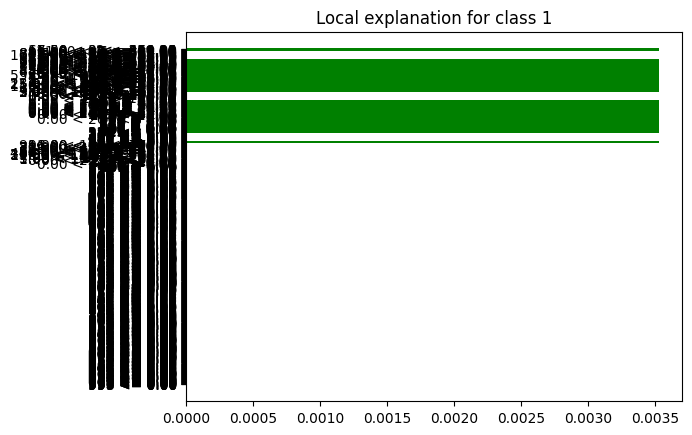

In [22]:
%matplotlib inline
fig = explanations.as_pyplot_figure()